In [16]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

1. Сделать имитатор бросания 2 костей (20 000 бросков). 

In [17]:
np.random.seed(0)
number_of_throws = 10000
dice1 = np.random.randint(1, 7, number_of_throws)
dice2 = np.random.randint(1, 7, number_of_throws)
len(dice1)

10000

2. Проверить вероятности выпадения цифр на каждой кости

In [18]:
dice1_ser = pd.Series(dice1).value_counts()
dice2_ser = pd.Series(dice2).value_counts()

dice1_ser = dice1_ser.sort_index()
dice2_ser = dice2_ser.sort_index()

print('dice1')
for i, v in dice1_ser.items():
    print('index: ', i, 'probability: ', v/number_of_throws)

print('dice1')
for i, v in dice1_ser.items():
    print('index: ', i, 'probability: ', v/number_of_throws)

dice1
index:  1 probability:  0.1669
index:  2 probability:  0.1714
index:  3 probability:  0.1601
index:  4 probability:  0.1706
index:  5 probability:  0.1645
index:  6 probability:  0.1665
dice1
index:  1 probability:  0.1669
index:  2 probability:  0.1714
index:  3 probability:  0.1601
index:  4 probability:  0.1706
index:  5 probability:  0.1645
index:  6 probability:  0.1665


3. Построить гистограмму выпадения сумм цифр на костях

In [19]:
dice_sum = np.random.randint(2, 13, number_of_throws)
dice_sum_ser = pd.Series(dice_sum).value_counts()
dice_sum_ser = dice_sum_ser.sort_index()
dice_sum_ser

2     899
3     901
4     922
5     935
6     937
7     946
8     903
9     860
10    887
11    914
12    896
dtype: int64

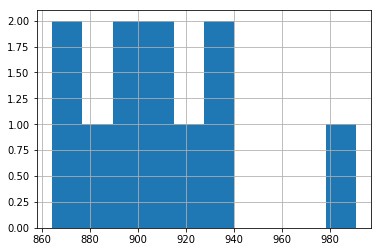

In [80]:
dice_sum_ser.hist();

4. Сделать 10 000 серий бросков. В каждой серии определить количество бросков до выпадения суммы на костях числа 9

In [20]:
ser_of_throws = pd.Series()
for i in range(number_of_throws):
    arr = np.random.randint(2, 13, number_of_throws)
    ser_of_throws = ser_of_throws.set_value(i, len(arr[arr < 9]))
    
ser_of_throws.head()

0    6385
1    6416
2    6387
3    6318
4    6361
dtype: int64

5. Визуализировать результат

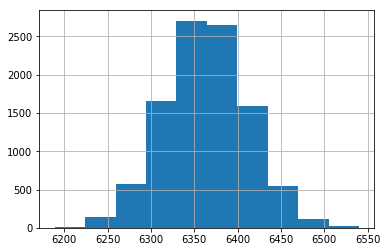

In [22]:
ser_of_throws.hist()

6. 7. Сгенерировать последовательность случайных чисел в диапазоне от 0 до 12, с нормальным распределением

In [23]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

norm_dest = get_truncated_normal(mean=5.5, sd=2, low=0, upp=12)
norm_dest = norm_dest.rvs(number_of_throws)
pd.Series(norm_dest).hist()


8. Сгенерировать 2 случайные последовательности. Получить из них третью, каждый элемент которой - сумма соответсвующих элементов первых двух последовательностей

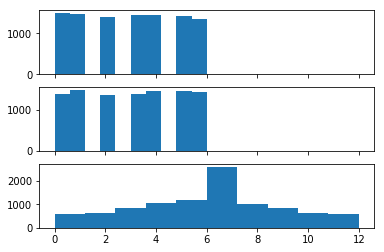

In [44]:
sequence1 = np.random.randint(0, 7, number_of_throws)
sequence2 = np.random.randint(0, 7, number_of_throws)
sum_of_sequences = np.add(sequence1, sequence2)

fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(sequence1)
ax[1].hist(sequence2)
ax[2].hist(sum_of_sequences)
plt.show()

10. Проверить, что полученное распределение соответствует нормальному распределению


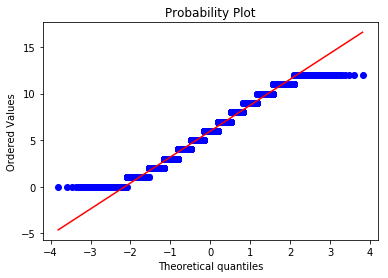

(0.9474217891693115, 0.5597866773605347)

In [58]:
stats.probplot(sum_of_sequences, dist="norm", plot=plt)
plt.show()

stats.shapiro(pd.Series(sum_of_sequences).value_counts())

11. 12 Из двух предыдущих последовательностей получить четвертую, каждый элемент которой равен отношению соответствующих элементов из первой последовательности к элементу второй последовательности

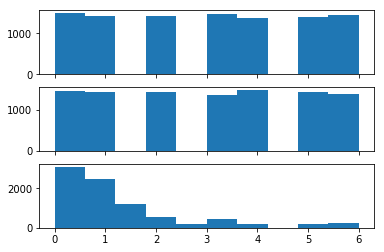

In [79]:
sequence1 = np.random.randint(0, 7, number_of_throws)
sequence2 = np.random.randint(0, 7, number_of_throws)
division_of_sequences = np.divide(sequence1, sequence2)

division_of_sequences_noinf= division_of_sequences[np.argwhere(~np.isinf(division_of_sequences))].flatten()

fig, axp = plt.subplots(3, sharex=True)
axp[0].hist(sequence1)
axp[1].hist(sequence2)
axp[2].hist(division_of_sequences_noinf)
plt.show()

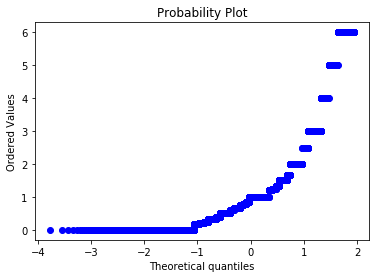

(0.6028591394424438, 6.649322017437953e-07)

In [81]:
stats.probplot(division_of_sequences_noinf, dist="norm", plot=plt)
plt.show()

stats.shapiro(pd.Series(division_of_sequences_noinf).value_counts())

14. Сгенерировать две новые случайные последовательности с разным RandomState.

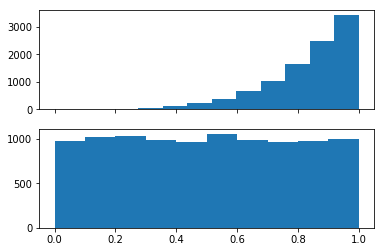

In [122]:
sequence1_new = np.random.power(5, number_of_throws)
sequence2_new = np.random.rand(number_of_throws)

fig, axp = plt.subplots(2, sharex=True)
axp[0].hist(sequence1_new)
axp[1].hist(sequence2_new)
plt.show()

16. Проверить корреляцию этих двух последовательностей.

In [128]:
print(stats.spearmanr(sequence1_new, sequence2_new))
print(stats.kendalltau(sequence1_new, sequence2_new))

SpearmanrResult(correlation=0.0073186515371865156, pvalue=0.4643007431784566)
KendalltauResult(correlation=0.004814601460146015, pvalue=0.47025521861710673)
